# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime


# Import API key
from config_we import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#base url with temperature units
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"

#query url with base url,api_key and units

query_url = f"{url}appid={api_key}&units={units}&q="

#list for response results
city_list=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lon=[]
max_temp=[]
wind_speed=[]

print(f"Beginning Data Retrieval")
print(f"------------------------")

#Set counters
counter=0
counter2=1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        counter+=1
            
        print(f'Processing Record {counter} Set of {counter2} | {city}') 
        if counter==50:
            counter2+=1
            counter=0
    except (KeyError, IndexError):
            print("City not found.Skipping....")
#print(json.dumps(response, indent=4, sort_keys=True))   
    
print(f'-----------------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------------')


Beginning Data Retrieval
------------------------
Processing Record 1 Set of 1 | faya
Processing Record 2 Set of 1 | norman wells
Processing Record 3 Set of 1 | bethel
Processing Record 4 Set of 1 | nalut
Processing Record 5 Set of 1 | khatanga
Processing Record 6 Set of 1 | jamestown
Processing Record 7 Set of 1 | bulgan
Processing Record 8 Set of 1 | tiksi
Processing Record 9 Set of 1 | iqaluit
Processing Record 10 Set of 1 | klyuchi
Processing Record 11 Set of 1 | thinadhoo
Processing Record 12 Set of 1 | hilo
Processing Record 13 Set of 1 | abha
Processing Record 14 Set of 1 | mataura
Processing Record 15 Set of 1 | chokurdakh
Processing Record 16 Set of 1 | katsuura
Processing Record 17 Set of 1 | la ronge
Processing Record 18 Set of 1 | kawambwa
Processing Record 19 Set of 1 | nikolskoye
Processing Record 20 Set of 1 | buraydah
Processing Record 21 Set of 1 | bonavista
Processing Record 22 Set of 1 | torrington
Processing Record 23 Set of 1 | saint-augustin
Processing Record 24 S

Processing Record 37 Set of 4 | cockburn town
Processing Record 38 Set of 4 | turbat
Processing Record 39 Set of 4 | port elizabeth
Processing Record 40 Set of 4 | maceio
Processing Record 41 Set of 4 | herat
Processing Record 42 Set of 4 | sitka
City not found.Skipping....
Processing Record 43 Set of 4 | namibe
Processing Record 44 Set of 4 | maragogi
Processing Record 45 Set of 4 | koumac
Processing Record 46 Set of 4 | orlik
Processing Record 47 Set of 4 | vaini
Processing Record 48 Set of 4 | fort saint james
City not found.Skipping....
Processing Record 49 Set of 4 | braniewo
Processing Record 50 Set of 4 | danilovka
Processing Record 1 Set of 5 | carballo
Processing Record 2 Set of 5 | linxia
Processing Record 3 Set of 5 | honningsvag
Processing Record 4 Set of 5 | saint anthony
Processing Record 5 Set of 5 | pevek
Processing Record 6 Set of 5 | guarapari
City not found.Skipping....
Processing Record 7 Set of 5 | timizart
City not found.Skipping....
Processing Record 8 Set of 5 |

Processing Record 24 Set of 8 | aljezur
Processing Record 25 Set of 8 | outjo
Processing Record 26 Set of 8 | mangan
Processing Record 27 Set of 8 | atherton
Processing Record 28 Set of 8 | saldanha
Processing Record 29 Set of 8 | northam
Processing Record 30 Set of 8 | racale
Processing Record 31 Set of 8 | khudumelapye
Processing Record 32 Set of 8 | vostok
Processing Record 33 Set of 8 | bavleny
Processing Record 34 Set of 8 | mildura
Processing Record 35 Set of 8 | kholodnyy
Processing Record 36 Set of 8 | yar-sale
Processing Record 37 Set of 8 | nemuro
Processing Record 38 Set of 8 | aswan
Processing Record 39 Set of 8 | mansa
Processing Record 40 Set of 8 | kroya
Processing Record 41 Set of 8 | ankazoabo
Processing Record 42 Set of 8 | kruisfontein
Processing Record 43 Set of 8 | mufumbwe
Processing Record 44 Set of 8 | mapiripan
Processing Record 45 Set of 8 | karratha
Processing Record 46 Set of 8 | saint-francois
Processing Record 47 Set of 8 | emba
City not found.Skipping....

In [7]:
print(len(wind_speed),len(city_list),len(humidity),len(max_temp),len(country))

549 549 549 549 549


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data=pd.DataFrame({"City":city_list,
                       "Cloudiness":cloudiness,
                        "Country":country,
                        "Date":date,
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lon":lon,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                       })
city_data.to_csv("cities_data.csv")
city_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lon           549
Max Temp      549
Wind Speed    549
dtype: int64

In [10]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Faya,0,SA,1543176000,62,18.39,42.45,59.00,2.48
1,Norman Wells,75,CA,1543176000,84,65.28,-126.83,-2.21,4.70
2,Bethel,1,US,1543179180,91,60.79,-161.76,12.02,20.80
3,Nalut,0,LY,1543180548,89,31.86,10.98,51.40,5.39
4,Khatanga,0,RU,1543180549,41,71.98,102.47,-26.63,5.61


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
#Set local time
localtime=time.strftime("%x")

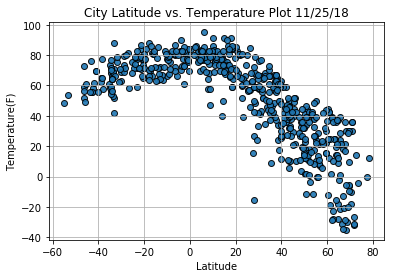

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o",edgecolor="black",alpha=.90)

# Incorporate other graph properties
plt.title("City Latitude vs. Temperature Plot "+ str(localtime))
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

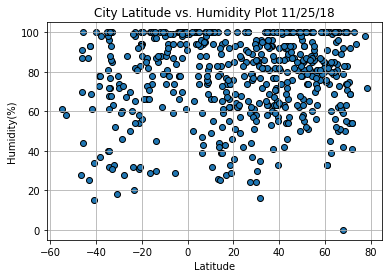

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity Plot "+ str(localtime))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

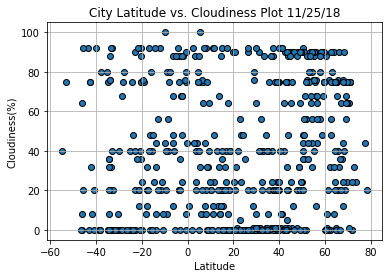

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness Plot "+str(localtime))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

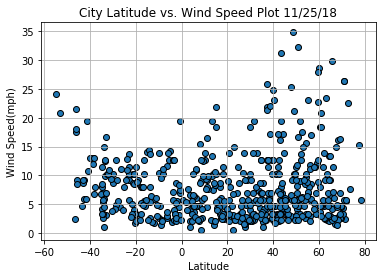

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o",edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed Plot "+str(localtime))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvsWindSpeed.png")

# Show plot
plt.show()


### Analysis: In the given sample of 549 cities on the given date 11/25/18 we can observe that from Equator to the South Pole temperatures tend to be close to 80's F. As the Latitude increases from 20 to 80 temperatures significantly drop.There is no strong relationship between Humidity vs Latitude, as well as Cloudiness vs Latitude. As for Wind Speed vs Latitude it can be observed that most cities will get wind speeds under 15 mph.
